# PHYS-E0412 Computational Physics :: Homework 8
Ari Viitala 432568

In [188]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy import interpolate
import scipy

In [189]:
N = 30
x = new_x
T = np.zeros((N,N))
V = np.zeros((N,N))
S = np.zeros((N,N))
H = np.zeros((N,N))

In [190]:
def pot(s):
    return -150*np.exp(-40*(s -0.25)**2)-50*np.exp(-10*(s-0.75)**2)

def bas(s, i, x):
    bas1 = 0
    
    if s > x[i - 1] and s <= x[i]:
        bas1 = (s - x[i-1]) / (x[i] - x[i-1])
    elif s > x[i] and s < x[i+1]:
        bas1 = (x[i+1] - s) / (x[i + 1] - x[i])
    
    return bas1

In [191]:
for i in range(1,N-1):
    hi = x[i] - x[i-1] 
    hj = x[i+1] - x[i]
    
    S[i,i-1] = 1/6 * hi
    S[i,i] = 1/3 * (hi + hj)
    S[i,i+1] = 1/6 * hj
    
    T[i, i] = 1 / hi + 1/hj
    T[i, i - 1] =  -1 / hi
    T[i, i + 1] = -1 / hj
    
    left = x[max(0, i - 2)]
    right = x[min(N-1, i + 2)]
    V[i, i -1] = quad(lambda a: bas(a,i, x) * pot(a) * bas(a, i-1, x), left, right)[0] 
    V[i, i] = quad(lambda a: bas(a,i, x) * pot(a) * bas(a, i, x), left, right)[0] 
    V[i, i +1] = quad(lambda a: bas(a,i, x) * pot(a) * bas(a, i+1, x), left, right)[0]

T *= 0.5

In [192]:
H = T + V

In [193]:
a, b = scipy.linalg.eigh(H[1:N-1,1:N-1], S[1:N-1,1:N-1])

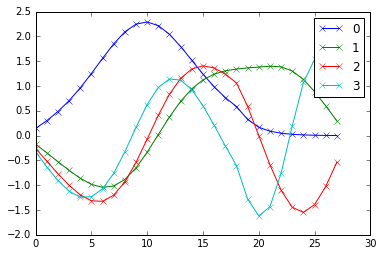

In [197]:
#plt.plot(pot(x))
for i in range(0, 4):
    plt.plot(-b[:, i], label = str(i), marker = "x")
plt.legend()

ValueError: x and y must have same first dimension

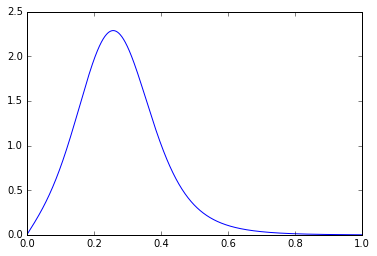

In [196]:
plt.plot(np.linspace(0, 1, 998), analytical)
plt.plot(new_x, b[:,0])

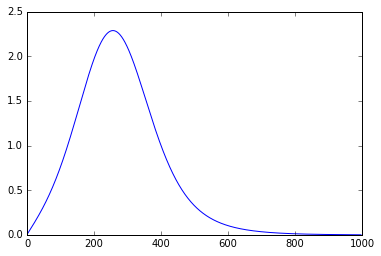

In [132]:
plt.plot(analytical)

In [154]:
x = np.linspace(0, 1, 30)
np.diff(x)


array([ 0.03448276,  0.03448276,  0.03448276,  0.03448276,  0.03448276,
        0.03448276,  0.03448276,  0.03448276,  0.03448276,  0.03448276,
        0.03448276,  0.03448276,  0.03448276,  0.03448276,  0.03448276,
        0.03448276,  0.03448276,  0.03448276,  0.03448276,  0.03448276,
        0.03448276,  0.03448276,  0.03448276,  0.03448276,  0.03448276,
        0.03448276,  0.03448276,  0.03448276,  0.03448276])

In [155]:
interp = interpolate.interp1d(np.linspace(0, 1, N-2), analytical)

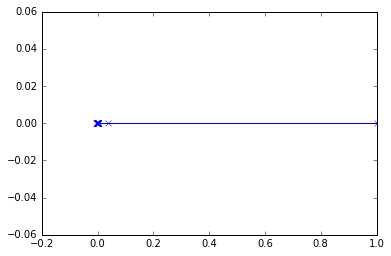

In [176]:
scaled = np.hstack(np.diff(x) / interp(x[:-1]))
normed = scaled / scaled.max()
new_x = np.array([0] + list(normed))
plt.plot(new_x, np.zeros_like(new_x), marker = "x")

In [187]:
np.linspace(0,1,1000-2)[np.argmax(analytical)]
start = np.linspace(0, 0.45, 20)
end = np.linspace(0.5, 1, 10)
new_x = np.hstack((start, end))

In [33]:
MV = np.loadtxt("V-51.txt")
MT = np.loadtxt("T-51.txt")
MS = np.loadtxt("S-51.txt")
MH = np.loadtxt("H-51.txt")

In [34]:
c,d = scipy.linalg.eigh(MH[1:N-1,1:N-1], MS[1:N-1,1:N-1])

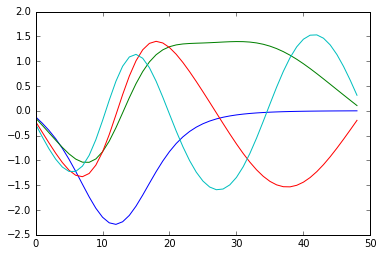

In [35]:
for i in range(0, 4):
    plt.plot(-d[:, i])

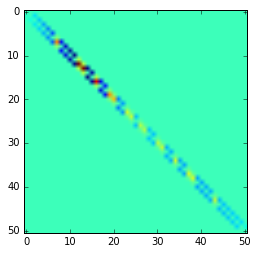

In [36]:
plt.imshow(H - MH)

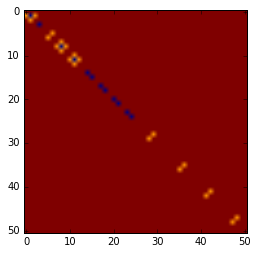

In [37]:
plt.imshow(S - MS)

In [38]:
S - MS

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [ -4.33680869e-19,  -1.73472348e-18,  -4.33680869e-19, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,  -4.33680869e-19,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

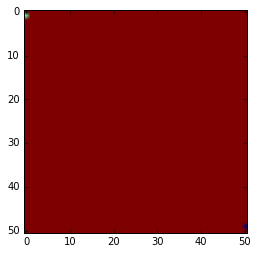

In [56]:
plt.imshow(V - MV)

In [63]:
V[:3, :3],MV[:3, :3            ]

(array([[ 0.        ,  0.        ,  0.        ],
        [-0.05077244, -0.24551562, -0.07324163],
        [ 0.        , -0.07324163, -0.34842714]]),
 array([[ 0.        ,  0.        ,  0.        ],
        [ 0.        , -0.24551562, -0.07324163],
        [ 0.        , -0.07324163, -0.34842714]]))